In [5]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

In [6]:
def kron(A, B):
    m, n = A.shape
    p, q = B.shape
    result = np.zeros((m * p, n * q))

    for i in range(m):
        for j in range(n):
            result[i * p:(i + 1) * p, j * q:(j + 1) * q] = A[i, j] * B

    return result

In [7]:
img = np.double(ski.io.imread(r'../images/bike.png', as_gray=True)) / 255
img = img.astype(np.double)

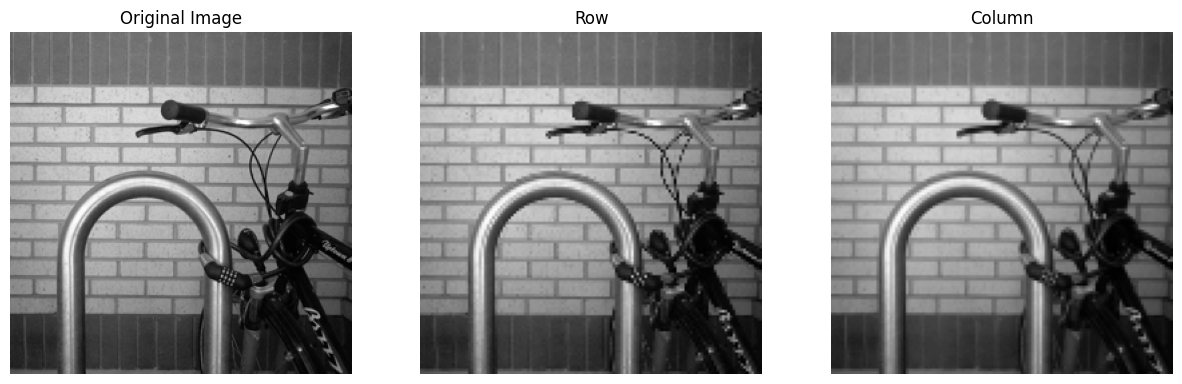

In [8]:
row, col = img.shape

a = np.eye(row // 2)
b = np.array([[1, 0]])
c = np.array([[0.5, 0.5]])

h1 = kron(a, b)
h2 = kron(a, c)

tranpose_h1 = h1.T
tranpose_h2 = h2.T

sub_img1 = np.dot(h1, img)
sub_img1 = np.dot(sub_img1, tranpose_h1)

sub_img2 = np.dot(h2, img)
sub_img2 = np.dot(sub_img2, tranpose_h2)

_, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(sub_img1, cmap='gray')
axs[1].set_title('Row')
axs[1].axis('off')

axs[2].imshow(sub_img2, cmap='gray')
axs[2].set_title('Column')
axs[2].axis('off')

plt.show()